# Deep Learning

# Data

### Description

This is a dataset for "Adult Census Income" from 1994. This is a multivariate dataset consisting of 14 attributes and more than 30K samples. This is a classification problem to predict whether income exceeds $50K/yr or not based on census data.
I got this data from UCI Machine Learning repository.

Below are

Listing of attributes: 

* **income** - >50K, <=50K. 

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. { Description of fnlwgt (final weight) --> The weights on the CPS files are controlled to independent estimates of the civilian non institutional population of the US.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,                10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-               inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,                       Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                     Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,                     Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Source of Data

Ron Kohavi, _"Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid"_, Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 
1996, http://robotics.stanford.edu/~ronnyk/nbtree.pdf

Dataset Source : https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
#Importing the Libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

dataset = pd.read_csv("adult.csv")

In [3]:
#Verifying the shape of data
dataset.shape

(32561, 15)

In [3]:
#Listing the columns of the dataset
dataset.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital status', 'occupation', 'relationship', 'race', 'sex',
       'captial-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

In [4]:
#Checking if there is any missing attribute in the entire dataset
np.any(dataset.isnull())

False

In [5]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
captial-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

There seem to be missing values in the data and the fields are filled with '?'. We will need to remove those rows so that Machine Learning Algorithms can be applied properly on such datasets.

**The income that will be predicted as part of Classification problem currently exists as <=50K or >50K. We can convert this to a binary classifier (-1,1) where -1 means income <= 50K and 1 means income > 50K**

In [4]:
#Replace '?' with NaN and then use dropna() method to delete all such rows
dataset = dataset.replace(' ?', np.NaN)
dataset = dataset.dropna()

dataset['income'] = dataset['income'].map({' <=50K' : 0, ' >50K' : 1})

Income has been successfully converted to a binary classifier (0,1), which we will use to plot and visualise the data in next step.

In [8]:
#Separating dependent variable and independent variables for plotting
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

### Plots for Understanding and Analysis


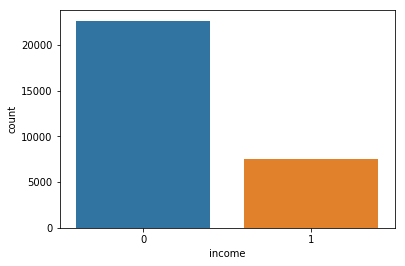

In [9]:
#Countplot of income
sns.countplot(dataset['income'])

Above plot shows that out of the 30K samples in our dataset, we have over 20K people whose income is less than or equal to 50K where as count of people with income over 50K is somewhere between 5K to 10K.

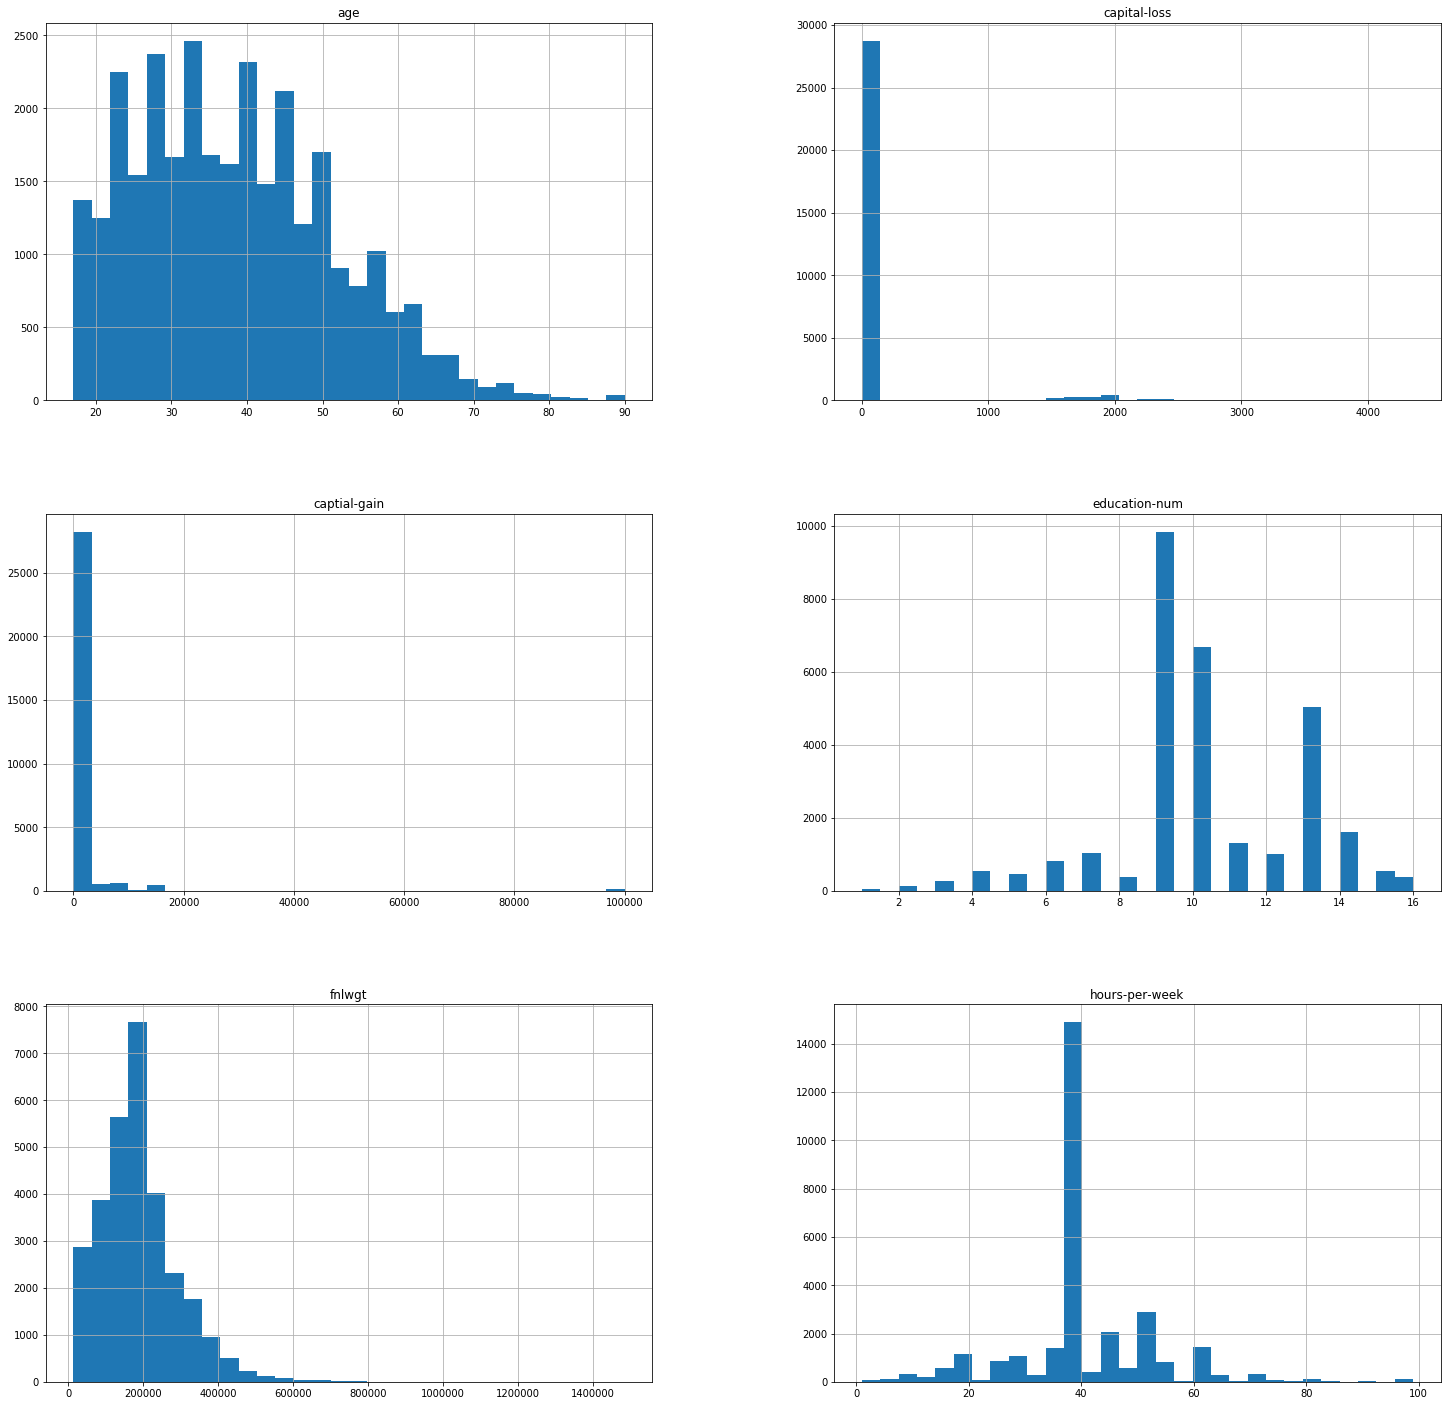

In [10]:
# To get the overall idea about the range of the attributes
X.hist(bins=30, figsize=(25,25))
plt.show()

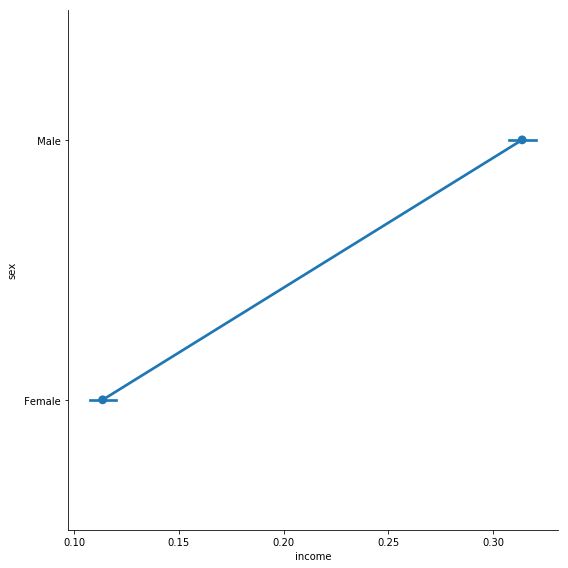

In [11]:
#Countplot for Income as per the sex
sns.catplot(data = dataset, x='income', y='sex', height = 8, kind='point' )

A plot for incomes for males and females. It depicts that incomes for males is greater compared to females.

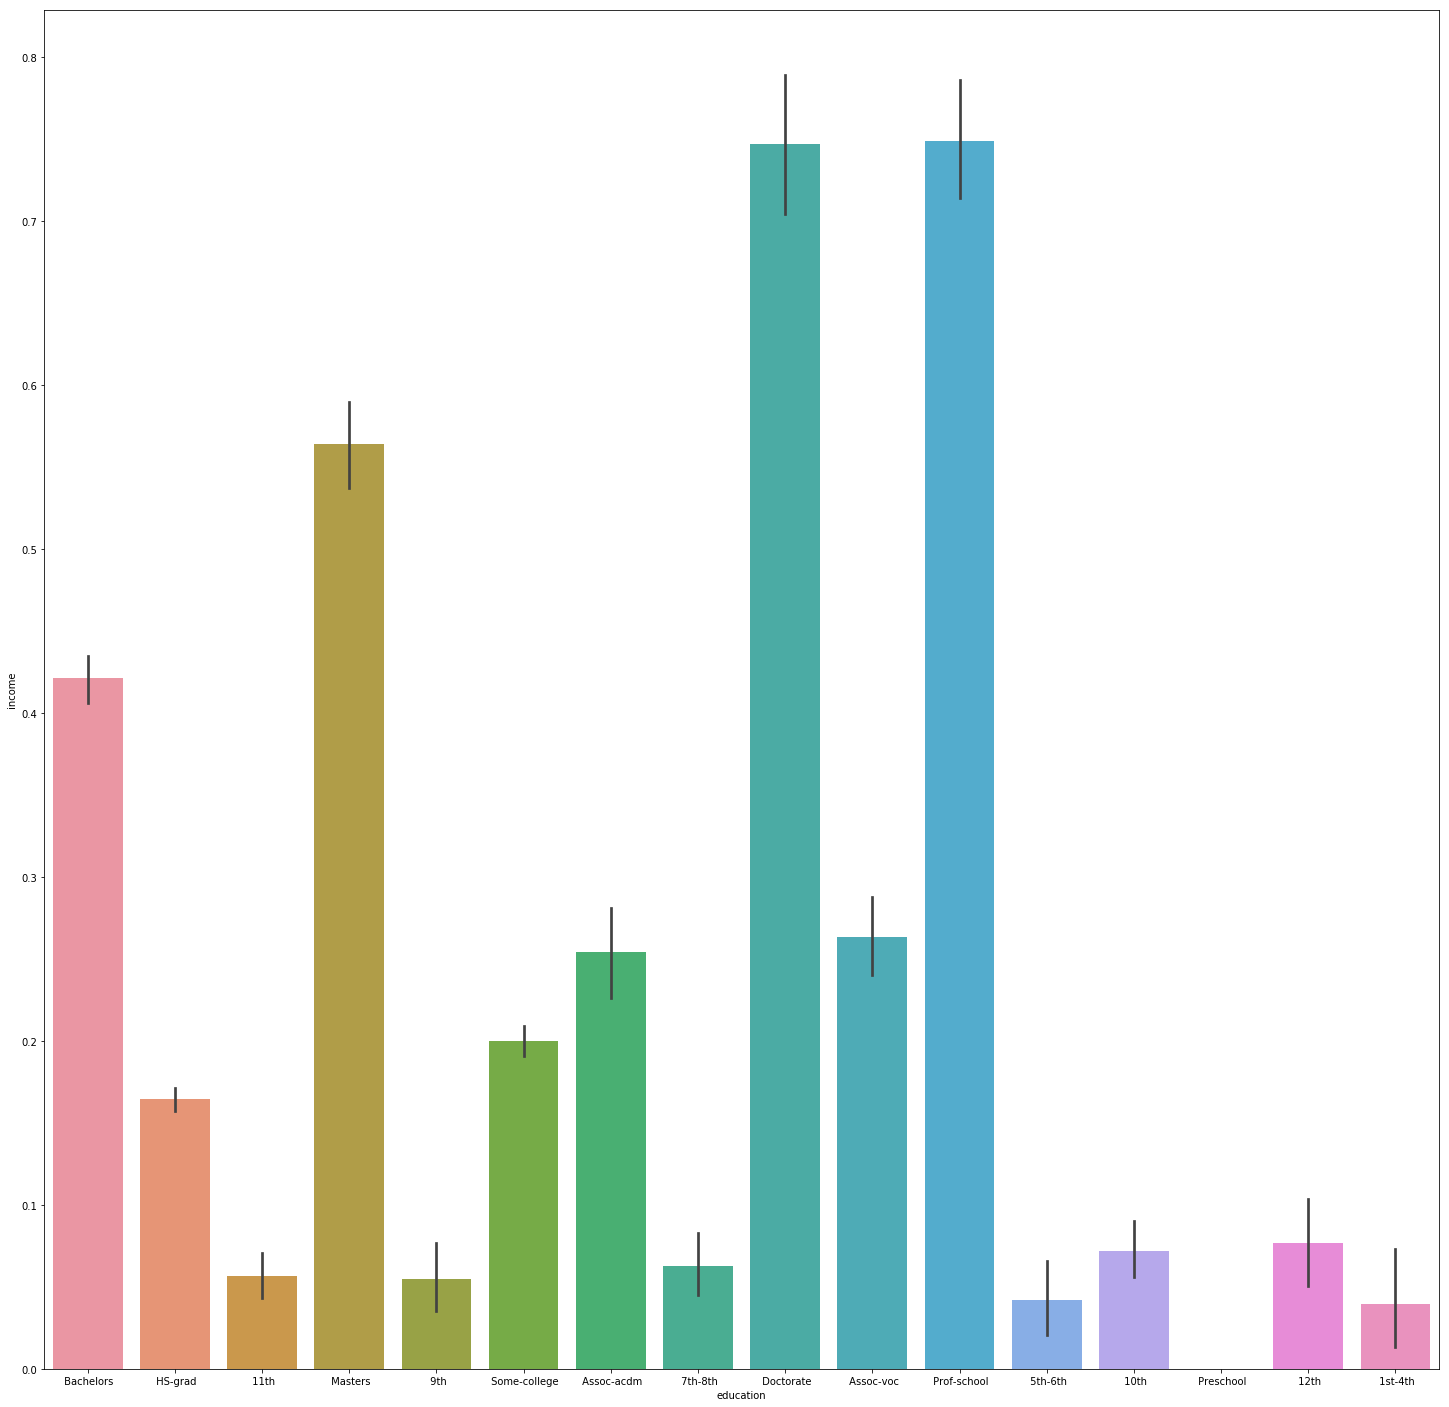

In [12]:
#Count plot as per the education of the population
plt.figure(figsize=(25,25))
sns.barplot(data=dataset, x = 'education', y = 'income')

Above plot shows the income based on the education of the population collected for this dataset. Doctorate & Prof-School seem to earning highest.

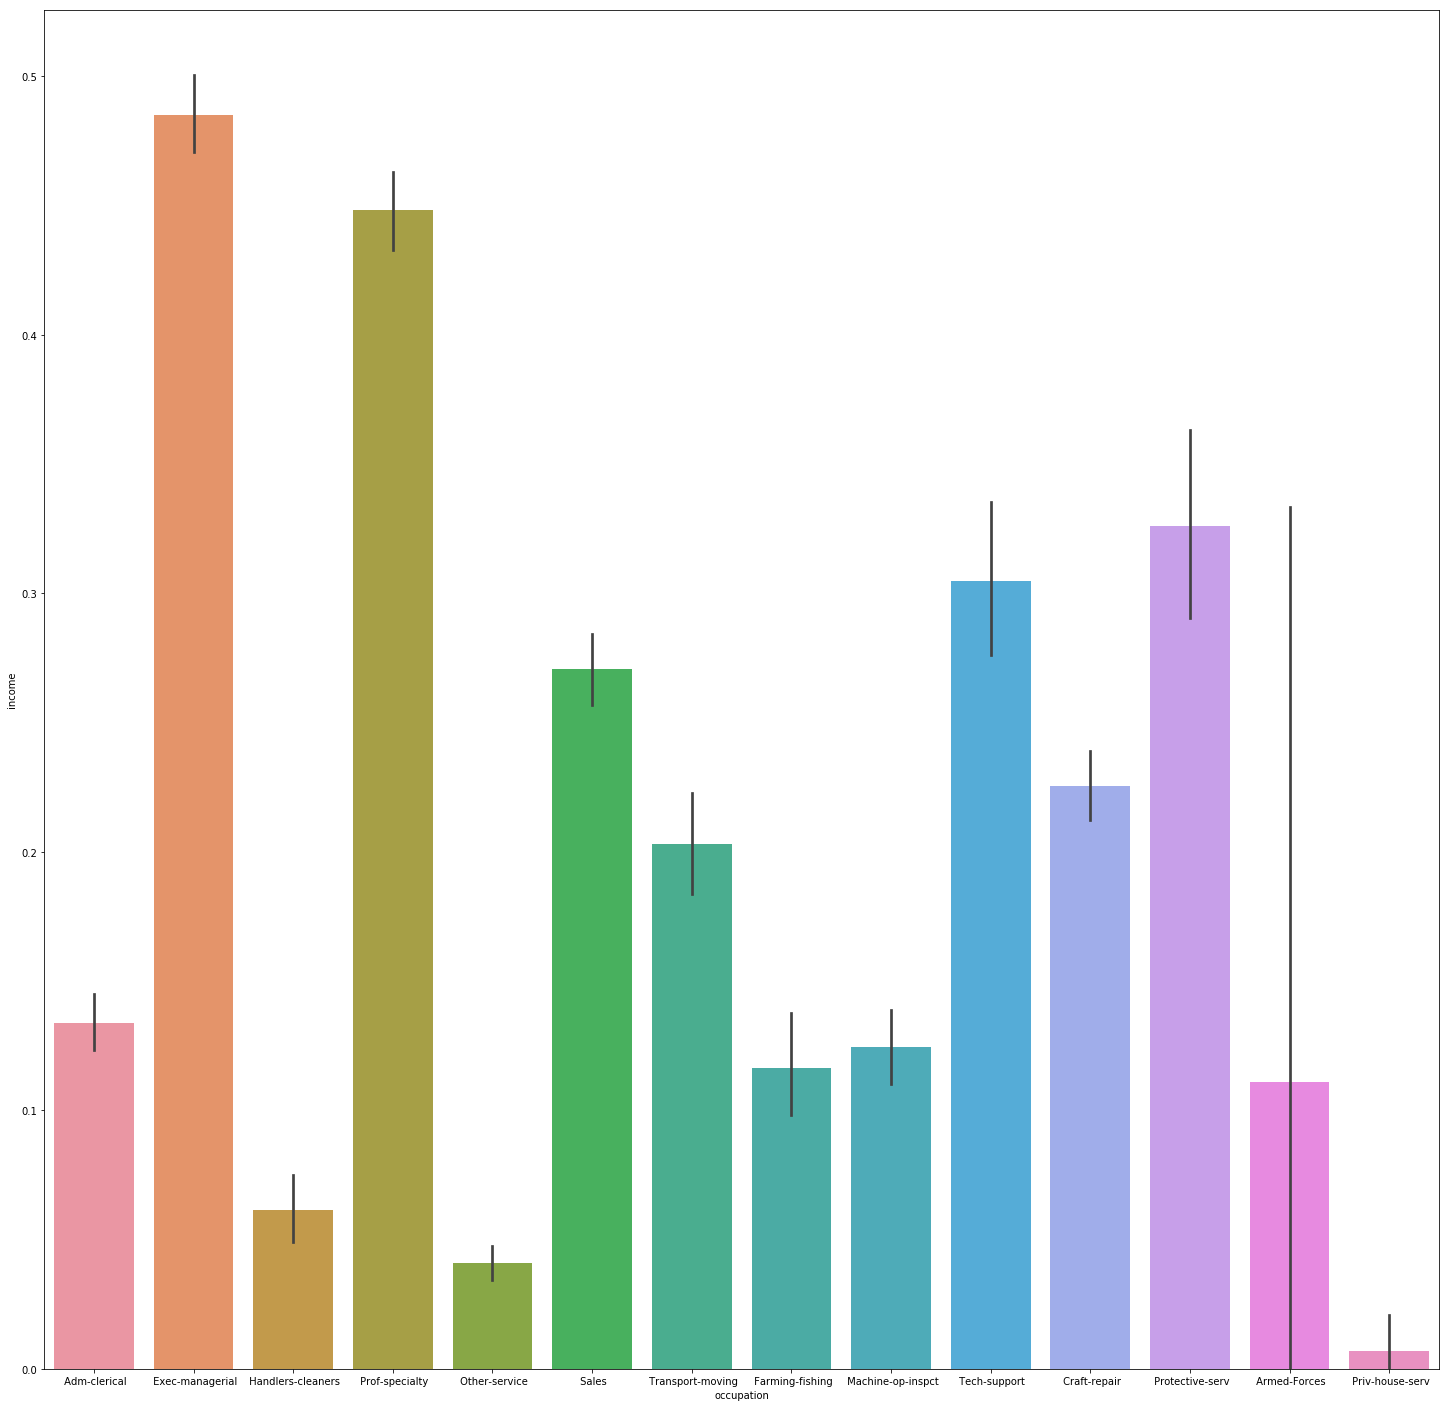

In [13]:
#Count plot as per the occupation of the population
plt.figure(figsize=(25,25))
sns.barplot(data=dataset, x = 'occupation', y = 'income')

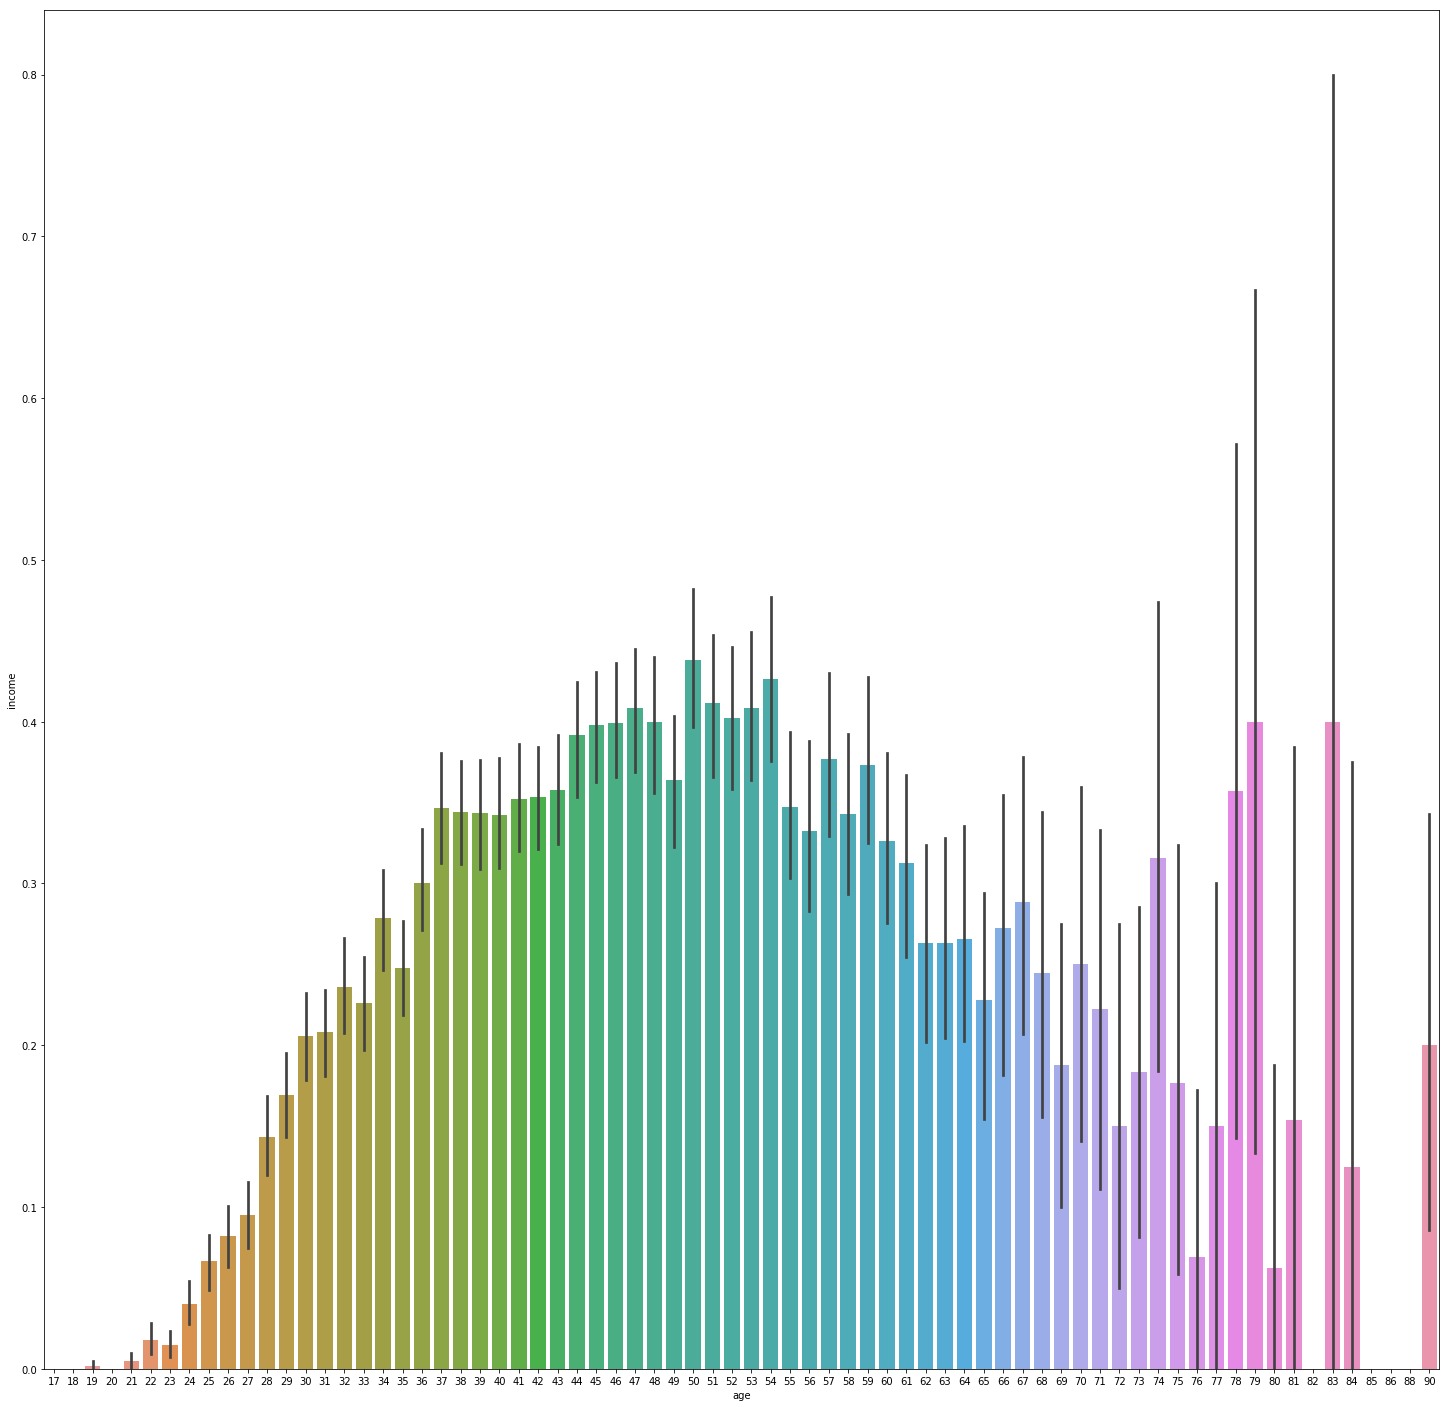

In [14]:
#Count plot for ncome as per the age of the population
plt.figure(figsize=(25,25))
sns.barplot(data=dataset, x = 'age', y = 'income')

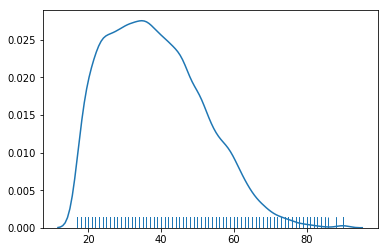

In [15]:
sns.distplot(np.array(dataset['age']), hist=False, rug=True)

### Preliminary Observation

Again first we imported the dataset, "adult.csv" and checked the basic attributes of the dataset. On observation, we found that there are some missing values in the dataset in the form of a special character " ?", used the replace and dropna methods to take care of missing data. In this dataset, the ultimate goal was to predict whether the salary of the person is over 50K or not. However, we needed to convert this attribute to binary classifiers (0,1), where 0 means income <= 50K and 1 means income > 50K.

Next, we splitted dataset to X and Y , where Y is the dependent variable and X contains all the independent variables. Then we plotted countplots, barplots, catplots, scatter plot and histograms for these variables. Most of the people in this dataset are earning less than 50K, a very small fraction of the population was earning over 50K. Next we plotted histograms for all the continuous attributes of the dataset and observed that were no major challenges in the dataset that needed to be scaled. We plotted age, sex, education and occupation to the income and observed following:

* People with age more than 78 are more probable of earning over 50K, while people under 20 years are more probable of earning less than 50K. 
* Exec-Managerials and Prof-Speciality are the ones most probable to earn over 50K, while people in occupation like Armed Forces, Other Services, Handlers-Cleaners are less probable to earn 50K or more.
* People who work as private house servant are least probable of earning >50k.
* Probability of males earning more than 50K is greater than females as per the catplot between Sex and income.

### Preprocessing



In [16]:
dataset.describe()

,age,fnlwgt,education-num,captial-gain,capital-loss,hours-per-week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


fnlwgt appears to be highly dispersive, we can remove it.

In [5]:
dataset = dataset.drop(['fnlwgt'], axis=1)
dataset.head()

,age,workclass,education,education-num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
dataset.shape

(30162, 14)

Finding out the unique values for the categorical variables.

In [19]:
print(dataset.workclass.unique())
print()
print(dataset.education.unique())
print()
print(dataset['marital status'].unique())
print()
print(dataset.occupation.unique())
print()
print(dataset.relationship.unique())
print()
print(dataset.race.unique())
print()
print(dataset.sex.unique())
print()
print(dataset['native-country'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

[' Male' ' Female']

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland'

There are many unique values for each of the category. If I use one hot encoder, then the data will be very sparse. To avoid this, lets generalise some categorical variables.

##### Workclass 
Lets classify it as Govt, Private, Self Employed and Unemployed.

##### Marital Status
Lets classify this simply as married and not married.

##### Education
Lets classify education as dropout, Bachelors, Masters, CommunityCollege, Doctorate, High Grad.

##### Country
Lets classify this as USA and rest of world (ROW) to avoid complexity.



In [6]:
#Workclass

dataset['workclass'].replace(' State-gov', 'Govt', inplace=True)
dataset['workclass'].replace(' Self-emp-not-inc', 'Self-Employed', inplace=True)
dataset['workclass'].replace(' Federal-gov', 'Govt', inplace=True)
dataset['workclass'].replace(' Local-govv', 'Govt', inplace=True)
dataset['workclass'].replace(' Self-emp-inc', 'Self-Employed', inplace=True)
dataset['workclass'].replace(' Without-pay', 'Unemployed', inplace=True)

In [7]:
# Marital Status

dataset['marital status'].replace(' Never-married', 'Not Married', inplace = True)
dataset['marital status'].replace(' Married-civ-spouse', 'Married', inplace = True)
dataset['marital status'].replace(' Divorced', 'Not Married', inplace = True)
dataset['marital status'].replace(' Married-spouse-absent', 'Not Married', inplace = True)
dataset['marital status'].replace(' Separated', 'Not Married', inplace = True)
dataset['marital status'].replace(' Married-AF-spouse', 'Married', inplace = True)
dataset['marital status'].replace(' Widowed', 'Not Married', inplace = True)

In [8]:
# Native Country

for i in dataset['native-country']:
    if i != " United-States":
        dataset['native-country'].replace(i, 'ROW', inplace = True)
    else:
        dataset['native-country'].replace(i, 'USA', inplace = True)

In [9]:
#Education

dataset['education'].replace(' HS-grad', 'High Grad', inplace = True)
dataset['education'].replace(' 11th', 'Dropout', inplace = True)
dataset['education'].replace(' 9th', 'Dropout', inplace = True)
dataset['education'].replace(' 7th-8th', 'Dropout', inplace = True)
dataset['education'].replace(' 5th-6th', 'Dropout', inplace = True)
dataset['education'].replace(' 10th', 'Dropout', inplace = True)
dataset['education'].replace(' 12th', 'Dropout', inplace = True)
dataset['education'].replace(' 1st-4th', 'Dropout', inplace = True)
dataset['education'].replace(' Preschool', 'Dropout', inplace = True)
dataset['education'].replace(' Some-college', 'CommunityCollege', inplace = True)
dataset['education'].replace(' Assoc-acdm', 'CommunityCollege', inplace = True)
dataset['education'].replace(' Assoc-voc', 'CommunityCollege', inplace = True)
dataset['education'].replace(' Prof-school', 'Masters', inplace = True)
dataset['education'].replace(' Masters', 'Masters', inplace = True)

Most of the categorical data has been simplified in terms of unique categories. Now we will separate them to different columns.



In [10]:
dataset_new = pd.concat([
                            dataset.iloc[:,0:1], pd.get_dummies(dataset['workclass']),
                         pd.get_dummies(dataset['education']),dataset.iloc[:,3:4],
                       pd.get_dummies(dataset['marital status']),
                         pd.get_dummies(dataset['occupation']),
                         pd.get_dummies(dataset['relationship']),
                         pd.get_dummies(dataset['race']),
                         pd.get_dummies(dataset[ 'sex']),
                    dataset.iloc[:,9:12], pd.get_dummies(dataset['native-country']), dataset.iloc[:,-1]],  axis = 1  )

In [25]:
dataset_new.head()

,age,Local-gov,Private,Govt,Self-Employed,Unemployed,Bachelors,Doctorate,CommunityCollege,Dropout,...,Black,Other,White,Female,Male,captial-gain,capital-loss,hours-per-week,ROW,income
0,39,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,2174,0,40,1,0
1,50,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,13,1,0
2,38,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,40,1,0
3,53,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,40,1,0
4,28,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,40,1,0


In [26]:
dataset_new.shape

(30162, 47)

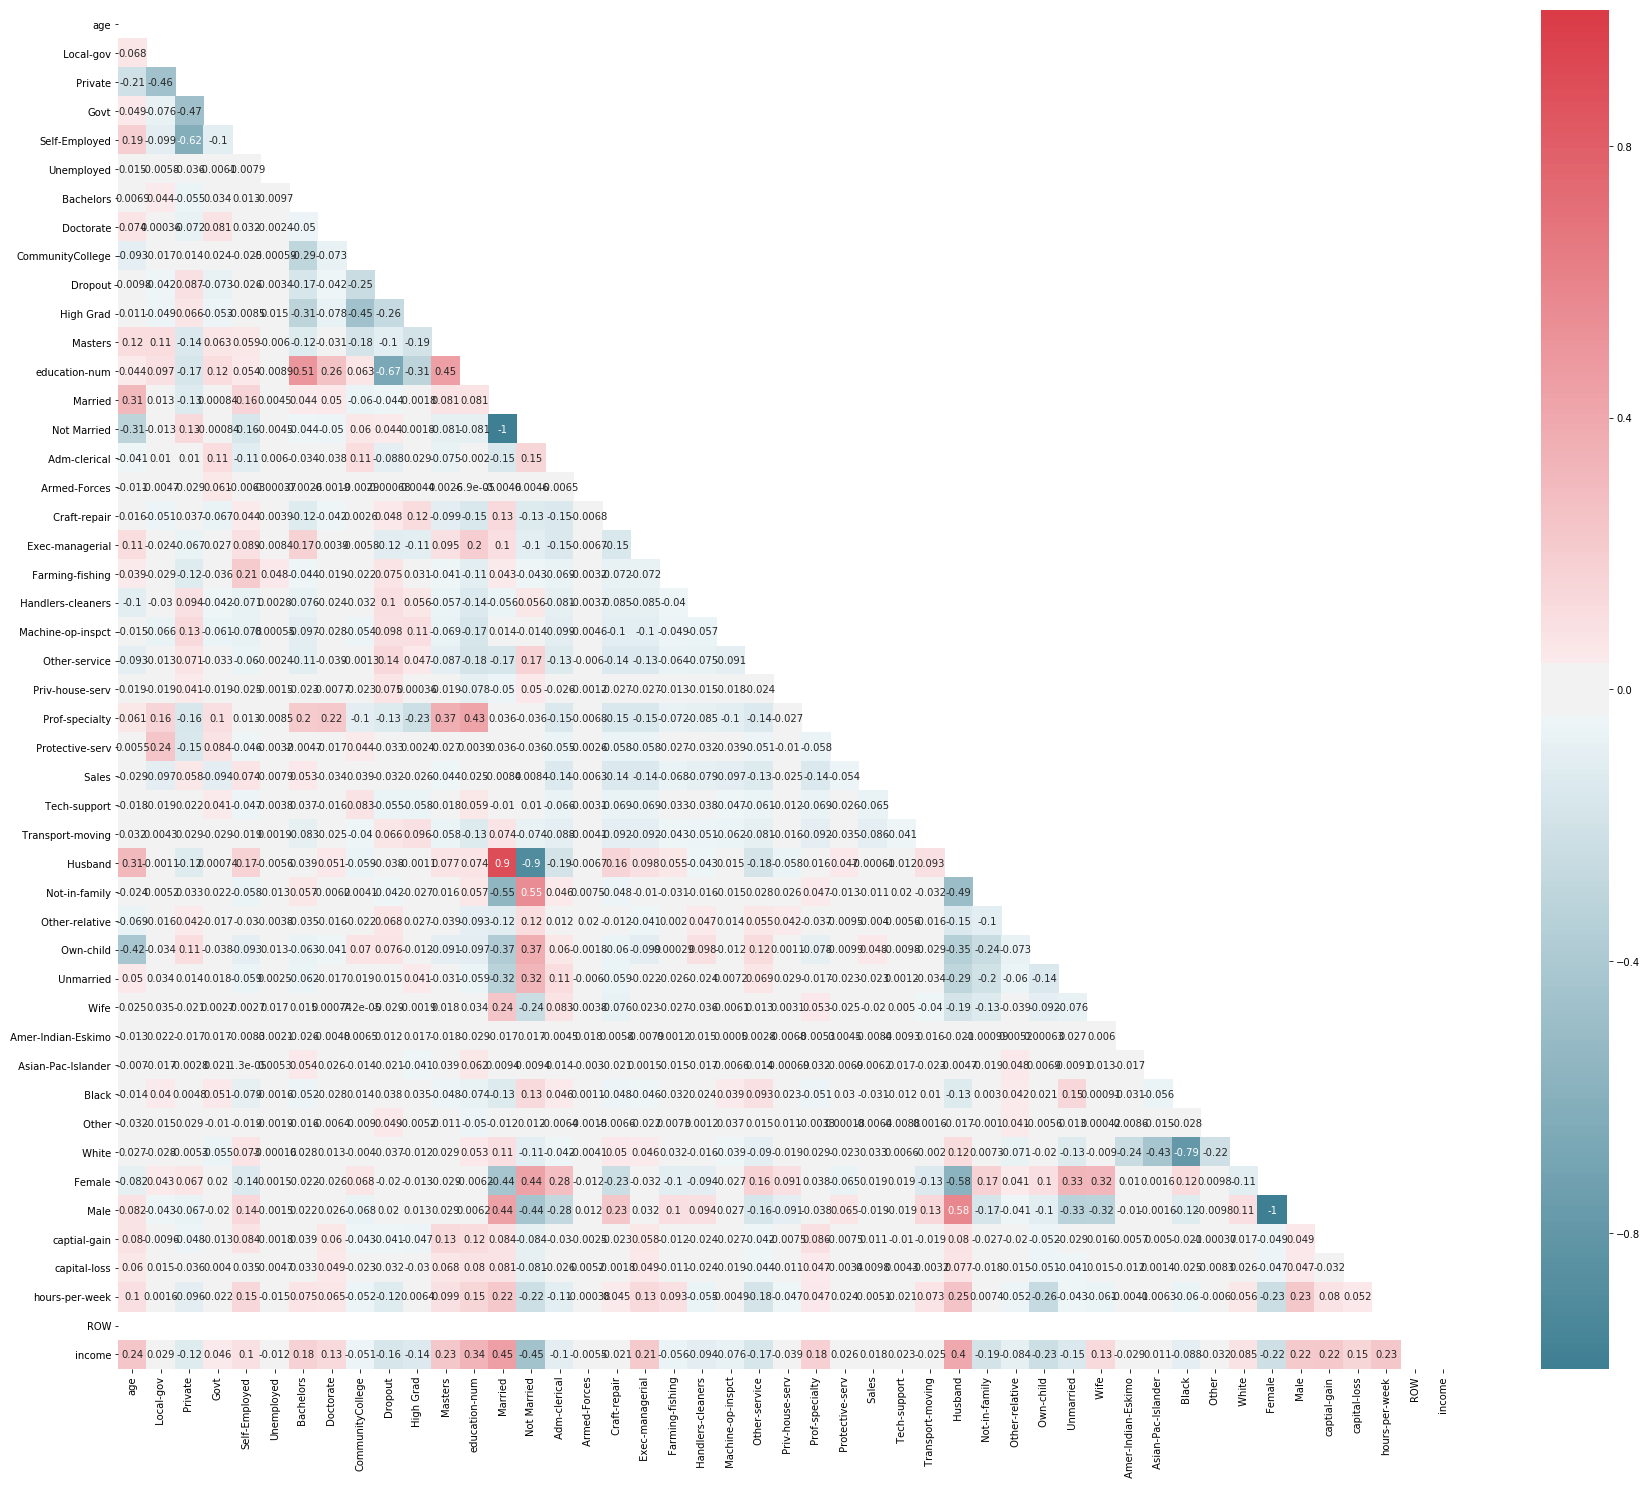

In [27]:
#Plotting the correlation heatmap

#Compute the correaltion matrix
corr = dataset_new.corr()

fif,ax = plt.subplots(figsize=(30,25))

#Generating mask for upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

#Generate the correaltion heatmap
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True)

In [28]:
corr['income'].sort_values(ascending = False)

income                 1.000000
Married                0.446110
 Husband               0.401236
education-num          0.335286
age                    0.241998
Masters                0.232721
hours-per-week         0.229480
captial-gain           0.221196
 Male                  0.216699
 Exec-managerial       0.213442
 Prof-specialty        0.181458
 Bachelors             0.178847
capital-loss           0.150053
 Doctorate             0.129162
 Wife                  0.125126
Self-Employed          0.100748
 White                 0.084735
Govt                   0.045758
 Local-gov             0.028673
 Protective-serv       0.026360
 Tech-support          0.022829
 Sales                 0.018450
 Asian-Pac-Islander    0.011394
 Armed-Forces         -0.005506
Unemployed            -0.012406
 Craft-repair         -0.021445
 Transport-moving     -0.024944
 Amer-Indian-Eskimo   -0.029426
 Other                -0.032104
 Priv-house-serv      -0.038618
CommunityCollege      -0.050715
 Farming

Firstly getting rid of the attributes that have negative correlation with the data such as Private, Unemployed, CommunityCollege, Dropout, Other, etc. as mentioned in the above correlation table.

In [11]:
dataset_final = dataset_new.drop([' Private','Unemployed', 'CommunityCollege', 'Dropout', ' Other', 'ROW', ' Own-child',
                                 ' Not-in-family', ' Other-service', ' Unmarried', ' Adm-clerical', ' Handlers-cleaners',
                                 ' Black', ' Other-relative', ' Machine-op-inspct', ' Farming-fishing', ' Priv-house-serv',
                                 ' Asian-Pac-Islander',' Armed-Forces', 'Unemployed', 'Not Married', ' Craft-repair',
                                  ' Transport-moving', ' Amer-Indian-Eskimo', ' Wife', ' White', 'Self-Employed', 'Married', 
                                  'education-num', ' Tech-support'], axis=1)

dataset_final.shape

(30162, 18)

In [12]:
dataset_final.head()

,age,Local-gov,Govt,Bachelors,Doctorate,High Grad,Masters,Exec-managerial,Prof-specialty,Protective-serv,Sales,Husband,Female,Male,captial-gain,capital-loss,hours-per-week,income
0,39,0,1,1,0,0,0,0,0,0,0,0,0,1,2174,0,40,0
1,50,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,13,0
2,38,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,40,0
3,53,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,40,0
4,28,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,40,0


So we have got rid of the categorical data and removed the unwanted columns from our dataset. Now lets split this data to training and test sets.

In [13]:
#Resetting the dataset indices
dataset_final = dataset_final.reset_index(drop = True)

In [14]:
dataset_final.head()

,age,Local-gov,Govt,Bachelors,Doctorate,High Grad,Masters,Exec-managerial,Prof-specialty,Protective-serv,Sales,Husband,Female,Male,captial-gain,capital-loss,hours-per-week,income
0,39,0,1,1,0,0,0,0,0,0,0,0,0,1,2174,0,40,0
1,50,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,13,0
2,38,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,40,0
3,53,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,40,0
4,28,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,40,0


##### Partitioning Data

I have defined this function to partition the dataset. This will first shuffle the indices of the dataset randomly, then I compute the size of training and test dataset and create the datasets using these randomly shuffled indices.

In [15]:
def partition(X, T, train_ratio): 
    """
    Partion the dataset to test and train
    
    Parameters
    -----------
    
    X: 2-d array of independent variables
    T: 1-d or 2-d array of dependent variable
    train_ratio : ratio of desired training dataset
    
    Returns
    --------
    
    4 lists with splitted datasets
    
    """
    
    # create random train/test split
    N = X.shape[0]
    idxs =  np.random.permutation(X.index)
    nrows = int(train_ratio * N)
    
    train_idxs = idxs[:nrows]
    test_idxs = idxs[nrows:]

    # split the actual data
    X_train, X_test = X.iloc[train_idxs], X.iloc[test_idxs]
    T_train, T_test = T.iloc[train_idxs], T.iloc[test_idxs]
    
    return X_train,X_test, T_train, T_test

The partition function that I defined will be returning dataframes not numpy arrays. I have done this because I will need these dataframes while visualizng my results in the later part of this exercise.

In [16]:
# Define Independent variables and dependent variables

X = dataset_final.iloc[:,:-1]
T = dataset_final.iloc[:,-1:]

print("X.shape = {} \nT.shape = {}".format(X.shape, T.shape))

X.shape = (30162, 17) 
T.shape = (30162, 1)


In [17]:
X_tr, X_ts, T_tr, T_ts = partition(X, T, train_ratio = 0.75 )

print(X_tr.shape, X_ts.shape, T_tr.shape, T_ts.shape)

(22621, 17) (7541, 17) (22621, 1) (7541, 1)


In [18]:
X_tr = X_tr.reset_index(drop=True)
X_ts = X_ts.reset_index(drop=True)
T_tr = T_tr.reset_index(drop=True)
T_ts = T_ts.reset_index(drop=True)

In [19]:
X_tr.shape, X_ts.shape, T_tr.shape, T_ts.shape

((22621, 17), (7541, 17), (22621, 1), (7541, 1))

In [20]:
X_train = X_tr.values
X_test = X_ts.values
T_train = T_tr.values
T_test = T_ts.values

X_train.shape, X_test.shape, T_train.shape, T_test.shape

((22621, 17), (7541, 17), (22621, 1), (7541, 1))

### Converting the Target variable to Indicator Matrix

In [26]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
labels = onehot_encoder.fit_transform(T_tr)
labels_test = onehot_encoder.fit_transform(T_test)

In [28]:
labels.shape, labels_test.shape

((22621, 2), (7541, 2))



#### Normalization

In [23]:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

In [24]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

# Methods

### Explanation of the choice for 3 different neural network structures and reason for the selection

In this section, I will explain about the three different models that I will be applying to my dataset. I will explain about the number of hidden layers and hidden units in each layer. I will also talk about the activation functions.

#### Model 1 : Random
In Model 1, I will be creating a random deep learning network with one input layer, 5 hidden layers and one output layers. I have set the dropouts randomly to ignore neurons during training. I will experiment it more in the next models. This was my first Deep Learning Network using Keras, so I just tried out with multiple hidden units and played with different number of neurons in each layer and dropping a fraction of them as well during training. I will use all possible activation functions such as 'relu', 'selu', 'tanh', 'sigmoid', 'hard_sigmoid', 'exponential' in each hidden layer and see how does it affect the model. I will be using softmax activation in the output layer as we need to predict the class of target variable.

#### Model 2 : Grid
I got the idea to design and test this model after seeing the complete chart of Neural Networks. There is a network known as "Deep Belief Network" which has half the number of neurons in alternative layer. So, I decided to try out a network with 64 neurons in first layer and then 32 in next layer and then 64 in next and so on.. I did not had any dropout in this deep learning structure and wanted to try with all the neurons to see how this structure works with my dataset. I will play with this model more in experimentation section. I will be using "relu" and "selu" activation functions alternatively in this structure as these are the best activation functions and avoid vanishing gradient problems.

#### Model 3 : Exhaustive
In the Model 3, I want to further deep in the neural network structure. My dataset looks simple to me and I want to try and find out if we have more and more layers in the Deep Learning structure, how well the model fits? So, for model 3 I chose to add 16 hidden layers in addition to one input and one output layers. I will be adding uniform dropout of 0.1 with lesser neurons in this structure to find out how my data fits to this model. We will have atmost 1024 neurons in a hidden layer with couple of layers in between with just a single neuron. Again, I will be using "relu" and "selu" activation functions in this structure as they avoid vanishing gradient problem.

### Relate the choice of dataset!

The dataset that I had choosen for this exercise is "Adult Income Census", which has been thoroughly preprocessed with respect to outliers, categorical data and binary labels. We converted the target variable to an indicator matrix. I am building the deep neural network structures using Keras. I have designed three different structures with various alterations in hidden layers and number of neurons in each layer. The idea is to try out these networks with various combinations of hidden layers and hidden units in each layer and evaluate the models and find out which one is the best. If we have a Image dataset which comprises of more complex features, then we definitely need more layers to learn the features of our dataset. However, this datase is small. That is the reason I have not taken more than 10 hidden layers. We will evaluate these models and compare them.

### Explanation of codes for each structure

Here are the key points wrt implemenatation of Deep Learning Neural Networks:

* I have used **Keras** to implement all the three models that I explained above as it runs seamlessly on CPU and GPU's both. 
* I have used **Keras Sequential model** to linearly stack the layers for all the three models.
* I used **keras.layers.Dense** to densely connect the NN Layers.
* I have used **keras.layers.Dropout** to ignore the neurons in hidden layers during the training.
* I have used **keras.layers.Activation** to try out different Activation Functions like 'relu', 'selu', 'tanh', 'sigmoid'
* I have used **categorical_crossentropy** & **binary_crossentropy** to determine losses as this is a Binary Class problem.
* I have used **keras.optimizers.RMSprop** optimizer which is good choice of Opmizer and works well with default values.
* I have used various evaluation metrics to evaluate my model.
* I am running 20 Epochs with a Batch size of 512 for all the models so that drawing the comparision is easy at the end
* For all the models, I have used softmax as the activation function for the output layer.

Here is the implementation of all three models using Keras:

#### Model 1: Random

In this model, I have one input layer, 5 hidden layers and one output layer. Number of neurons in Hidden layers are : 64,32,10,128,128

I have used 'relu', 'exponential', 'tanh', 'hard_sigmoid' and 'sigmoid' activation functions and all the other parameters remains same as explained above.

Epoch 1/20
22621/22621 [==============================] - 12s 519us/step - loss: 0.6352 - acc: 0.7085 7s - loss: 0.6467 - ac
Epoch 2/20
22621/22621 [==============================] - 1s 55us/step - loss: 0.5855 - acc: 0.7439
Epoch 3/20
22621/22621 [==============================] - 1s 56us/step - loss: 0.5675 - acc: 0.7529
Epoch 4/20
22621/22621 [==============================] - 1s 61us/step - loss: 0.5624 - acc: 0.7531
Epoch 5/20
22621/22621 [==============================] - 1s 57us/step - loss: 0.5571 - acc: 0.7534
Epoch 6/20
22621/22621 [==============================] - 1s 57us/step - loss: 0.5505 - acc: 0.7584
Epoch 7/20
22621/22621 [==============================] - 1s 57us/step - loss: 0.5409 - acc: 0.7682
Epoch 8/20
22621/22621 [==============================] - 1s 56us/step - loss: 0.5321 - acc: 0.7754
Epoch 9/20
22621/22621 [==============================] - 1s 57us/step - loss: 0.5300 - acc: 0.7777
Epoch 10/20
22621/22621 [==============================] - 1s 61us/step - l

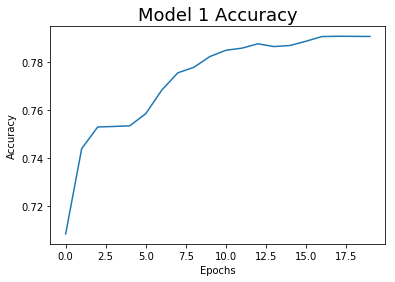

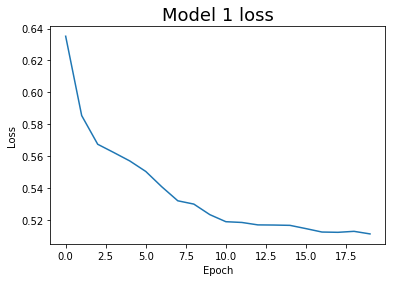


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      5618
           1       0.95      0.18      0.30      1923

   micro avg       0.79      0.79      0.79      7541
   macro avg       0.86      0.59      0.59      7541
weighted avg       0.82      0.79      0.73      7541


 Confusion Matrix 
 [[5600   18]
 [1581  342]]

 Accuracy: 78.8 %

 F1 Score:  0.587

 Precision:  0.865

 Recall:  0.587

 MCC: 0.357


In [139]:
#Necessary Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, roc_curve, auc


#Define model1
def model1():
    model1 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function and 0.5 dropout
    model1.add(Dense(64, activation='sigmoid', input_dim=X_train_normalized.shape[1]))
    model1.add(Dropout(0.5))

    #adding 5 hidden layers with different number of neurons
    model1.add(Dense(64, activation='relu'))
    model1.add(Dropout(0.5))

    model1.add(Dense(32,activation='exponential'))
    model1.add(Dropout(0.6))

    model1.add(Dense(10,activation='tanh'))

    model1.add(Dense(128,activation='sigmoid'))
    model1.add(Dropout(0.1))

    model1.add(Dense(128,activation='hard_sigmoid'))
    model1.add(Dropout(0.5))

    #Output layer with softmax activation and 2 neurons as we have 2 classes
    model1.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model1.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score = model1.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 1 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 1 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predict the values for test set
    y_pred = model1.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test,y_pred))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred, average="macro"),3))
    print("\n MCC:", round(matthews_corrcoef(T_test,y_pred),3))

model1()

#### Model 2: Grid

Model 2 contains 64 and 32 neurons in each layer alternatively. I have choosen 'relu' and 'selu' as my activation functions for the hidden layers training. There is no dropout in any of these layers. 

Epoch 1/20
22621/22621 [==============================] - 12s 548us/step - loss: 0.5079 - acc: 0.7843
Epoch 2/20
22621/22621 [==============================] - 1s 49us/step - loss: 0.4893 - acc: 0.7987
Epoch 3/20
22621/22621 [==============================] - 1s 51us/step - loss: 0.4830 - acc: 0.8019
Epoch 4/20
22621/22621 [==============================] - 1s 48us/step - loss: 0.4782 - acc: 0.8017
Epoch 5/20
22621/22621 [==============================] - 1s 47us/step - loss: 0.4729 - acc: 0.8021: 1s - loss: 0.4
Epoch 6/20
22621/22621 [==============================] - 1s 42us/step - loss: 0.4672 - acc: 0.8031
Epoch 7/20
22621/22621 [==============================] - 1s 42us/step - loss: 0.4609 - acc: 0.8031
Epoch 8/20
22621/22621 [==============================] - 1s 41us/step - loss: 0.4580 - acc: 0.8033
Epoch 9/20
22621/22621 [==============================] - 1s 40us/step - loss: 0.4552 - acc: 0.8034
Epoch 10/20
22621/22621 [==============================] - 1s 51us/step - loss: 0.

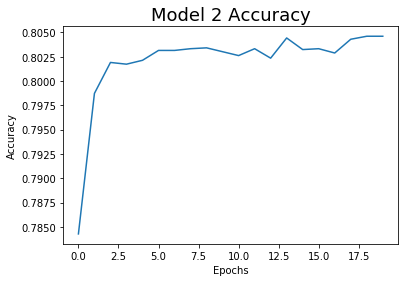

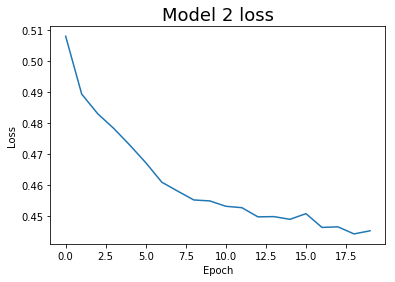


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      5618
           1       0.77      0.28      0.41      1923

   micro avg       0.79      0.79      0.79      7541
   macro avg       0.78      0.62      0.64      7541
weighted avg       0.79      0.79      0.76      7541


 Confusion Matrix 
 [[5455  163]
 [1389  534]]

 Accuracy: 79.42 %

 F1 Score:  0.642

 Precision:  0.782

 Recall:  0.624

 MCC: 0.374


In [140]:
#Define model2
def model2():
    model2 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function 
    model2.add(Dense(64, activation='selu', input_dim=X_train_normalized.shape[1]))

    #adding 6 hidden layers with 64 and 32 neurons alternatively
    model2.add(Dense(32, activation='relu'))

    model2.add(Dense(64,activation='selu'))

    model2.add(Dense(32,activation='relu'))

    model2.add(Dense(64,activation='selu'))

    model2.add(Dense(32,activation='relu'))

    model2.add(Dense(64,activation='selu'))

    #Output layer with softmax activation and 2 neurons as we have 2 classes
    model2.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model2.compile(loss='binary_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model2.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model2.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 2 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 2 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_2 = model2.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test,y_pred_2))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_2))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_2)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_2, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_2, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_2, average="macro"),3))
    print("\n MCC:", round(matthews_corrcoef(T_test,y_pred_2),3))

model2()

#### Model 3: Exhaustive

* This is a more complex model with 16 hidden layers and one input & one output layer.
* The number of neurons in Hidden layers are: 24, 10, 1, 48, 20, 128, 64, 32, 10, 64, 10, 1, 256, 512, 1024, 256 
* The activation functions for these hidden layers are 'relu' and 'selu'.
* Uniform Dropout of 0.1 for all the hidden layers.

Epoch 1/20
22621/22621 [==============================] - 17s 756us/step - loss: 0.5637 - acc: 0.7583
Epoch 2/20
22621/22621 [==============================] - 6s 254us/step - loss: 0.5244 - acc: 0.7769
Epoch 3/20
22621/22621 [==============================] - 6s 253us/step - loss: 0.5193 - acc: 0.7811
Epoch 4/20
22621/22621 [==============================] - 5s 235us/step - loss: 0.5122 - acc: 0.7880
Epoch 5/20
22621/22621 [==============================] - 5s 234us/step - loss: 0.5085 - acc: 0.7898
Epoch 6/20
22621/22621 [==============================] - 5s 237us/step - loss: 0.5087 - acc: 0.7898
Epoch 7/20
22621/22621 [==============================] - 5s 238us/step - loss: 0.5102 - acc: 0.7891
Epoch 8/20
22621/22621 [==============================] - 5s 238us/step - loss: 0.5081 - acc: 0.7898
Epoch 9/20
22621/22621 [==============================] - 5s 234us/step - loss: 0.5069 - acc: 0.7907
Epoch 10/20
22621/22621 [==============================] - 5s 235us/step - loss: 0.5037 - 

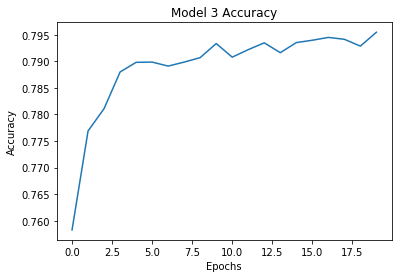

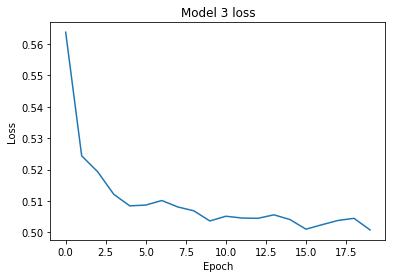


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5618
           1       0.85      0.28      0.42      1923

   micro avg       0.80      0.80      0.80      7541
   macro avg       0.83      0.63      0.65      7541
weighted avg       0.81      0.80      0.76      7541


 Confusion Matrix 
 [[5526   92]
 [1386  537]]

 Accuracy: 80.4 %

 F1 Score:  0.651

 Precision:  0.827

 Recall:  0.631

 MCC: 0.414


In [151]:
#Define model3
def model3():
    model3 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function and 0.5 dropout
    model3.add(Dense(X_train_normalized.shape[1], activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 10 hidden layers 
    model3.add(Dense(24, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(48, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(20, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(128, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(64, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(32,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(64,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(512,activation='elu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1024,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='selu'))
    model3.add(Dropout(0.1))

    #Output layer with softmax activation and 2 neurons as we have 2 classes
    model3.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model3.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score_3 = model3.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 3 Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 3 loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predict the values for test set
    y_pred_3 = model3.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test,y_pred_3))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_3))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_3)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_3, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_3, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_3, average="macro"),3))
    print("\n MCC:", round(matthews_corrcoef(T_test,y_pred_3),3))

model3()

### Explanation of Experimental Codes

In the previous section, we designed three different Deep Learning Neural Networks and named them as :

**Random; Grid; Exhaustive**

**_Random Model_** had random configurations of layers and nodes per layer. I designed it using 5 Hidden Layers and tried each of the possible activation function. It had random choice of Neurons in each layer and the dropouts in each layer were randomly selected.

**_Grid Model_** was more of a systematic search across the number of layers and nodes per layer. I got the idea to design such network after seeing the image of Deep Belief Network. My idea was to design a network which has half the number of neurons in next layer and double the neurons in next layer. I designed it using 6 hidden layers and 0 Dropouts.

In **_Exhaustive Model_**, my idea was go deeper in the hidden layers and I increased the hidden layers to 16 with random choice of neurons in hidden layers. I tried to put couple of layers with single neuron in between hidden layers and then went upto atmost 1024 neurons in some layers. I had a uniform Dropout Rate of 0.1 across all the layers in this model.

# Results

### Discussion About Evaluation Metrics

In this section, we will discuss some popular classification measurements that I have used to evaluate metrics for our models that we implemented in previous section.

The most basic one of them is Accuracy:
$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

#### Confusion Matrix
A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). With confusion matrix we get information about the classification results. 

#### Precision
Precision is number of items correctly identified as positive out of total items identified as positive.

$$
\text {precision} = \frac{\text{ TP } } {\text{ TP + FP } } 
$$

#### Recall or Sensitivity or TPR (True Positive Rate)
Recall is number of items correctly identified as positive out of total true positives.

$$
\text {recall} = \frac{\text{ TP } } {\text{ TP + FN } } 
$$

#### Specificity or TNR (True Negative Rate)
Specificity is Number of items correctly identified as negative out of total negatives.

$$
\text {specificity} = \frac{\text{ TN } } {\text{ TN + FP } } 
$$

#### False Positive Rate or Type I Error
Number of items wrongly identified as positive out of total true negatives.

$$
\text {FPR} = \frac{\text{ FP } } {\text{ TN + FP } } 
$$

#### False Negative Rate or Type II Error
Number of items wrongly identified as negative out of total true positives.

$$
\text {FNR} = \frac{\text{ FN } } {\text{ TP + FN } } 
$$

#### F1 Score
It is the harmonic mean of precision and score and given by:

$$
F_1 = 2 \times \frac{precision \times recall}{precision + recall}
$$

#### MCC (Matthews Correlation Coefficient)
It uses all the counts given in confusion matrix.

$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$

#### The ROC (Receiver Operating Characteristic) Curve

The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity).  Ideally, we would like to have high sensitivity & high specificity, but in real-world scenarios, there is always a tradeoff between sensitivity & specificity. ROC Curve Analysis provides tools to select possible optimal models and to discard suboptimal ones independently from the class distribution. 

#### AUC (Area Under the Curve)

For the ROC curve, AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve. 
Some important characteristics of ROC-AUC are-

* The value can range from 0 to 1. However AUC score of a random classifier for balanced data is 0.5
* ROC-AUC score is independent of the threshold set for classification because it only considers the rank of each prediction and not its absolute value. The same is not true for F1 score which needs a threshold value in case of probabilities output.

## Plots for Results

**Plots for Loss and Accuracy for each model has been plotted in the Method Section. Here are additonal plots for ROC-AUC Curves, Confusion Matrix & Actual-Predicted Values Overlapping plots.**

##### ROC Curves for all three models

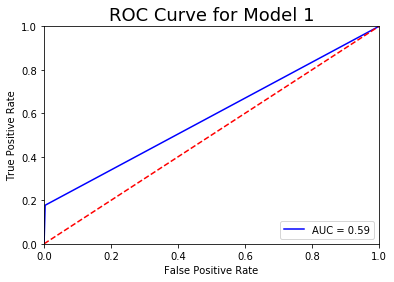

In [142]:
fpr, tpr, threshold = roc_curve(T_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 1', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

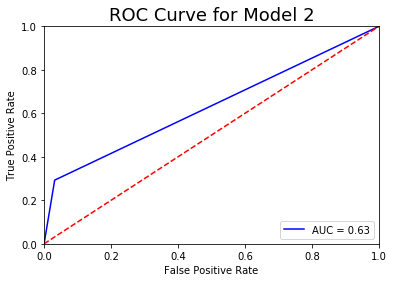

In [143]:
fpr, tpr, threshold = roc_curve(T_test, y_pred_2)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 2', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

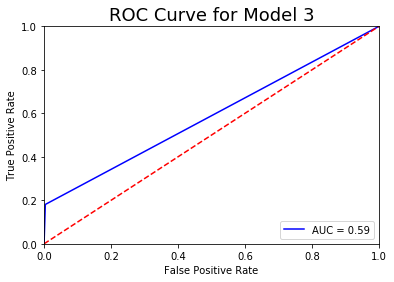

In [152]:
fpr, tpr, threshold = roc_curve(T_test, y_pred_3)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 3', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Plotting random 200 actual vs predicted values

I have used below plots to show the overlap of test and predicted sets. As the test was large enough i.e. it contained more than 6K samples, so I randomly picked few datapoints in middle of the dataset to visualise how model is performing.

Text(0.5, 1.0, 'Model 1 : Predicted Vs Output')

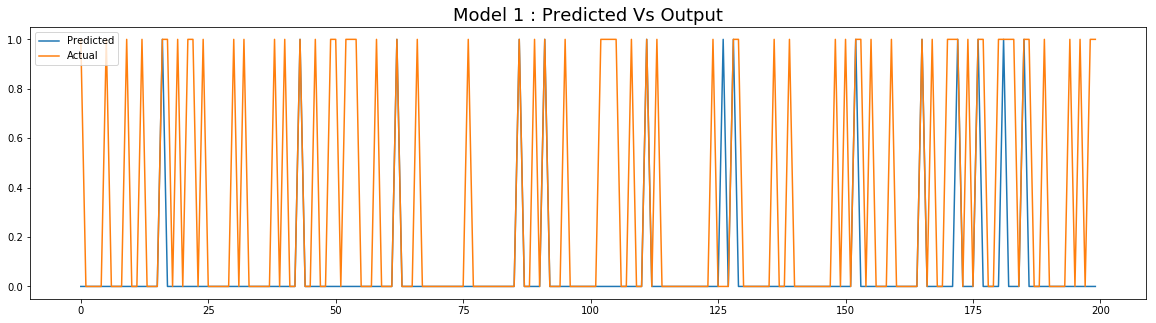

In [145]:
plt.figure(figsize=(20,5))
plt.plot(y_pred[1900:2100], label = 'Predicted')
plt.plot(T_test[1900:2100], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 1 : Predicted Vs Output", fontsize = 18)

Text(0.5, 1.0, 'Model 2 : Predicted Vs Output')

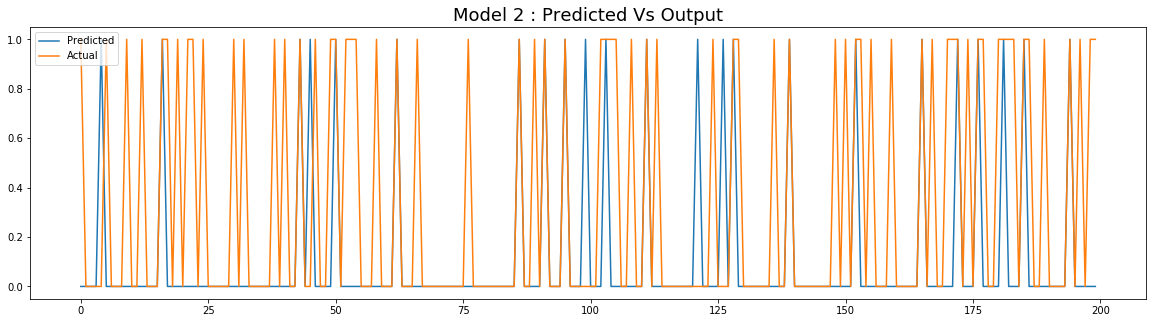

In [146]:
plt.figure(figsize=(20,5))
plt.plot(y_pred_2[1900:2100], label = 'Predicted')
plt.plot(T_test[1900:2100], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 2 : Predicted Vs Output", fontsize = 18)

Text(0.5, 1.0, 'Model 3 : Predicted Vs Output')

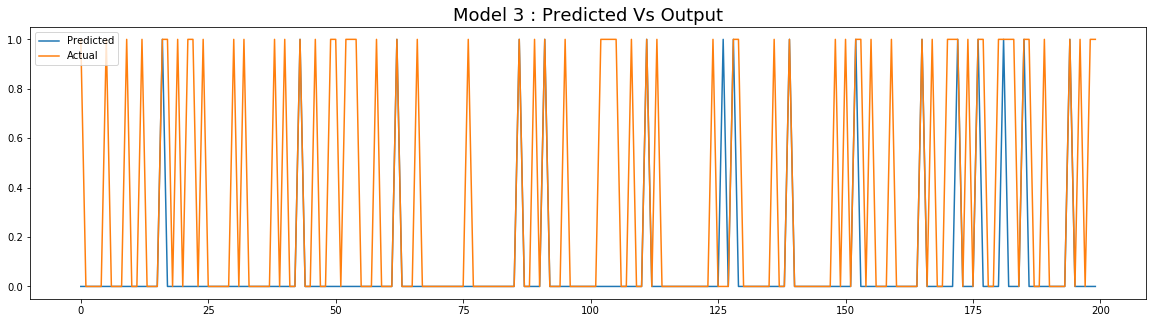

In [147]:
plt.figure(figsize=(20,5))
plt.plot(y_pred_3[1900:2100], label = 'Predicted')
plt.plot(T_test[1900:2100], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 3 : Predicted Vs Output", fontsize = 18)

##### Confusion Matrix Plots for all models

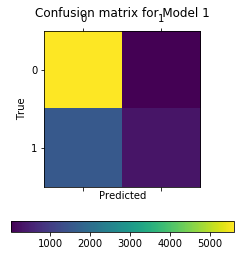

In [148]:
plt.matshow(confusion_matrix(T_test, y_pred))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Model 1', fontsize = 12)
plt.colorbar(orientation = 'horizontal')

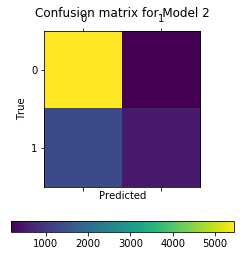

In [149]:
plt.matshow(confusion_matrix(T_test, y_pred_2))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Model 2', fontsize = 12)
plt.colorbar(orientation = 'horizontal')

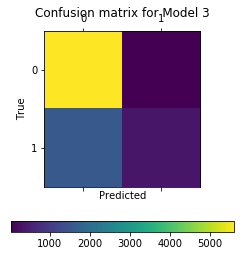

In [150]:
plt.matshow(confusion_matrix(T_test, y_pred_3))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Model 3', fontsize = 12)
plt.colorbar(orientation = 'horizontal')

## Discussions about the choice of network structures

|$$Models$$ | **hlayers** | $$hunits$$ |**Accuracy** | **F1 Score** | **Precision** | **Recall** | **MCC** | **ROC-AUC** | 
|-----------|-------------|------------|-------------|--------------|---------------|------------|---------|-------------|
|$$Model 1 : Random$$    | 5  |$$64,32,10,128,128$$ |  78.80%    |0.587         |0.865         |0.587       |0.357    |0.59      |
|$$Model 2 : Grid$$  | 6     |$$32,64,32,64,32$$     |    79.42%    |0.642         |0.782         |0.624       |0.374    |0.63|
|$$Model 3 : Exhaustive$$   | 16  | $$24,10,1,48,20,128,64,32,10,64,10,1,256,512,1024,256$$ | 80.4%  |0.651 |0.827 |0.631|0.414   |0.59  |

Ideally we choose the model which has a balance of all the scores. As I observed from the above table, **Exhaustive Model** is looking very good as it has good accuracy, precision, recall , F1 Score even though it does not have the highest ROC-AUC Score but it is close to the best ROC-AUC Score of Grid Model. The higher the ROC-AUC, it tells degree of model capability of distinguishing between classes.An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. The reason behind this is because this adult income dataset is not well normally distributed. When I performed pre-processing and initial visualizations, it seemed to be skewed.

One of the other important measure to pick a classifier model is **F1 Score**, which is the harmonic mean of **Precison** and **Recall**. Again, **Exhaustive Model** wins among all the other models as it has highest F1 Score of 0.651 whereas Random Model being the least effective with F1 score of 0.587.

The **MCC** is in essence a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1. The higher the MCC score, the better our model is. So, Random Model has a score of 0.357 and Grid Model has a score of 0.374, which means these models produce more False Positives and False Negatives,whereas Exhaustive Model has the highest MCC Score of 0.414. 

**_From the above discussion, we can conclude that Exhaustive Model i.e. the model with highest number of Hidden Layers (16) is best among all the models for this dataset while the Random Model is the last one as it was designed randomly with all activation functions. Grid Model was the second best for this dataset._**

# Conclusions

This was another interesing exercise  and I learned a lot about Classification, Deep Learning, Machine Learning, Keras. I was able to design three different Deep Learning Neural Networks and fit with my classification data and evaluate all the models using Standard Classification Metrics like Accuracy, Precision, Recall, F1 Score, MCC Score and ROC-AUC Score. I chose the model with balance of all good scores as my best model and eventually it turned out to be the one with highest number of hidden layers. I thought my dataset was fairly simple for a Deep Learning Neural Network and the number of hidden layers shouldn't make much difference. However, with more hidden layers, the model learned the input features more closely and was able to predict with higher accuracy. I tried building networks with Tensorflow but that didn't go well as I had some version mismatch issues. However, I was able to fix it. But still I chose Keras which runs on top of Tensorflow to build my three deep learning neural networks as it is more user-friendly and easy to use as compared to TF.

Here is the summarization of my key learning through this Deep Learning Exercise:

* Building and Compiling a model using Keras.
* Creating a baseline neural network model.
* Evaluation of Keras model using scikit-learn scores
* Experimentation with Network Topology specifically hidden layers, hidden units and dropouts.
* Debugging and fixing the errors encountered while implemenation of these models. 

# Additional Analysis for training Speed with GPUs

I will be using Google Colaboratory to test the training speed with GPUs for these Deep Learning Models. Google Colab is a free cloud service and now it supports free GPU! It provides free **Tesla K80 GPU**- using Keras, Tensorflow and PyTorch. 

Before running it on GPUs, I will rerun my models and record the training the time for each model. 

In [177]:
#Record Training times
training_time_local = []

Epoch 1/20
22621/22621 [==============================] - 18s 788us/step - loss: 0.6148 - acc: 0.7192
Epoch 2/20
22621/22621 [==============================] - 1s 65us/step - loss: 0.5801 - acc: 0.7481
Epoch 3/20
22621/22621 [==============================] - 1s 64us/step - loss: 0.5679 - acc: 0.7530
Epoch 4/20
22621/22621 [==============================] - 2s 69us/step - loss: 0.5632 - acc: 0.7531
Epoch 5/20
22621/22621 [==============================] - 2s 67us/step - loss: 0.5573 - acc: 0.7531
Epoch 6/20
22621/22621 [==============================] - 2s 71us/step - loss: 0.5493 - acc: 0.7570
Epoch 7/20
22621/22621 [==============================] - 2s 81us/step - loss: 0.5375 - acc: 0.7720
Epoch 8/20
22621/22621 [==============================] - 3s 129us/step - loss: 0.5260 - acc: 0.7815
Epoch 9/20
22621/22621 [==============================] - 2s 93us/step - loss: 0.5202 - acc: 0.7844
Epoch 10/20
22621/22621 [==============================] - 2s 107us/step - loss: 0.5187 - acc: 0.

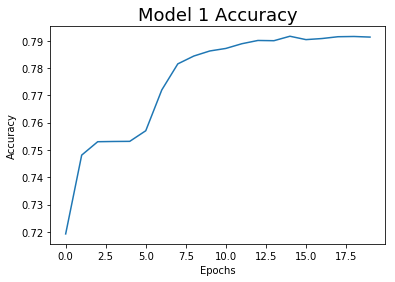

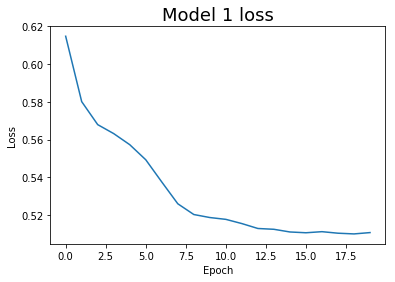


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      5618
           1       0.95      0.18      0.30      1923

   micro avg       0.79      0.79      0.79      7541
   macro avg       0.86      0.59      0.59      7541
weighted avg       0.82      0.79      0.73      7541


 Confusion Matrix 
 [[5600   18]
 [1581  342]]

 Accuracy: 78.8 %

 F1 Score:  0.587

 Precision:  0.865

 Recall:  0.587

 MCC: 0.357
Time taken by Model 1 :  64.19928336143494 seconds


In [178]:
import time
start1 = time.time()
model1()
end1 = time.time()
print("Time taken by Model 1 : ",(end1 - start1),"seconds")
training_time_local.append((end1 - start1))

Epoch 1/20
22621/22621 [==============================] - 14s 617us/step - loss: 0.5029 - acc: 0.7947
Epoch 2/20
22621/22621 [==============================] - 1s 47us/step - loss: 0.4868 - acc: 0.7981
Epoch 3/20
22621/22621 [==============================] - 1s 56us/step - loss: 0.4802 - acc: 0.8011
Epoch 4/20
22621/22621 [==============================] - 1s 53us/step - loss: 0.4730 - acc: 0.8010: 0s - loss: 0.4824
Epoch 5/20
22621/22621 [==============================] - 1s 54us/step - loss: 0.4671 - acc: 0.8004
Epoch 6/20
22621/22621 [==============================] - 1s 48us/step - loss: 0.4628 - acc: 0.8022: 0s - loss: 0.4663 - acc: 0
Epoch 7/20
22621/22621 [==============================] - 1s 48us/step - loss: 0.4562 - acc: 0.8023
Epoch 8/20
22621/22621 [==============================] - 1s 45us/step - loss: 0.4576 - acc: 0.8028
Epoch 9/20
22621/22621 [==============================] - 1s 46us/step - loss: 0.4557 - acc: 0.8022
Epoch 10/20
22621/22621 [==========================

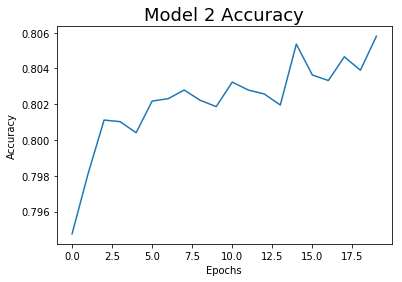

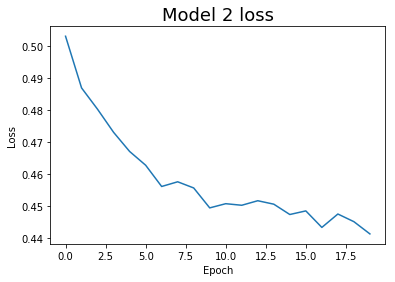


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5618
           1       0.80      0.27      0.40      1923

   micro avg       0.80      0.80      0.80      7541
   macro avg       0.80      0.62      0.64      7541
weighted avg       0.80      0.80      0.76      7541


 Confusion Matrix 
 [[5488  130]
 [1406  517]]

 Accuracy: 79.63 %

 F1 Score:  0.64

 Precision:  0.798

 Recall:  0.623

 MCC: 0.382
Time taken by Model 2 :  55.72940111160278 seconds


In [179]:
start2 = time.time()
model2()
end2 = time.time()
print("Time taken by Model 2 : ",(end2 - start2),"seconds")
training_time_local.append((end2 - start2))

Epoch 1/20
22621/22621 [==============================] - 25s 1ms/step - loss: 0.5332 - acc: 0.7750
Epoch 2/20
22621/22621 [==============================] - 6s 253us/step - loss: 0.5158 - acc: 0.7841
Epoch 3/20
22621/22621 [==============================] - 6s 285us/step - loss: 0.5121 - acc: 0.7870
Epoch 4/20
22621/22621 [==============================] - 6s 246us/step - loss: 0.5132 - acc: 0.7865
Epoch 5/20
22621/22621 [==============================] - 6s 271us/step - loss: 0.5078 - acc: 0.7898
Epoch 6/20
22621/22621 [==============================] - 7s 291us/step - loss: 0.5059 - acc: 0.7915
Epoch 7/20
22621/22621 [==============================] - 6s 248us/step - loss: 0.5074 - acc: 0.7904
Epoch 8/20
22621/22621 [==============================] - 6s 260us/step - loss: 0.5099 - acc: 0.7886
Epoch 9/20
22621/22621 [==============================] - 6s 259us/step - loss: 0.5076 - acc: 0.7899
Epoch 10/20
22621/22621 [==============================] - 7s 289us/step - loss: 0.5038 - ac

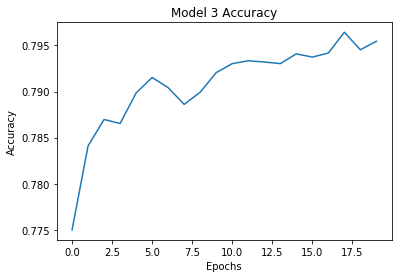

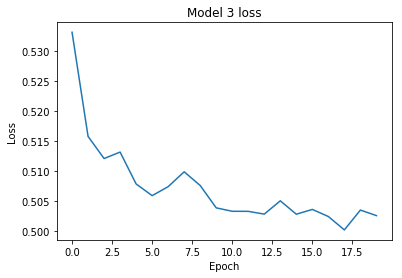


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      5618
           1       0.78      0.28      0.42      1923

   micro avg       0.80      0.80      0.80      7541
   macro avg       0.79      0.63      0.65      7541
weighted avg       0.79      0.80      0.76      7541


 Confusion Matrix 
 [[5469  149]
 [1380  543]]

 Accuracy: 79.72 %

 F1 Score:  0.646

 Precision:  0.792

 Recall:  0.628

 MCC: 0.386
Time taken by Model 3 :  162.50662350654602 seconds


In [180]:
start3 = time.time()
model3()
end3 = time.time()
print("Time taken by Model 3 : ",(end3 - start3),"seconds")
training_time_local.append((end3 - start3))

In [182]:
training_time_local

[64.19928336143494, 55.72940111160278, 162.50662350654602]

I will be exporting my preprocessed data to use it in Google Colab

In [167]:
#Exporting the Dataframes to csv to run them on GPUs
from pandas import DataFrame
df = DataFrame(X_tr)
df.to_csv("X_tr.csv", index = None, header=True)
df = DataFrame(T_tr)
df.to_csv("T_tr.csv", index = None, header=True)
df = DataFrame(X_ts)
df.to_csv("X_t.csv", index = None, header=True)
df = DataFrame(T_ts)
df.to_csv("T_ts.csv", index = None, header=True)

I ran all of my models in Google Colab with **Hardware Accelerator as GPU**.


<img src="accel.png" />

Here are the Hardware details of Tesla GPU used by Google Colab:

 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"  
 device_type: "GPU"  
 memory_limit: 14800692839  
 locality {  
   bus_id: 1  
   links {  
   }  
 }  
 incarnation: 5934618651688996880  
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]  
 
 Here is the link to my Colab Notebook : https://colab.research.google.com/drive/1VNsv0SK3fB-FauJemXv76Cztfeit4P6z

In [183]:
#Copying the Runtimes on GPU from Colab
training_time_gpu = [8.595637798309326, 8.472150564193726, 15.351582765579224]

In [214]:
#creating a dataframe of these results
import pandas as pd
times = pd.DataFrame({'Model': ['Random','Grid', 'Exhaustive'],'GPU' : training_time_gpu, 'Local' : training_time_local})
times

,Model,GPU,Local
0,Random,8.595638,64.199283
1,Grid,8.472151,55.729401
2,Exhaustive,15.351583,162.506624


This is clear from the above summarization that the GPU are much much faster than the CPU running on a local system. The last model consisted of 10 hidden layers and took 162 seconds ~ 3 mins where as the same model took just 15 seconds when run on Google Colab with GPU Hardware Accelerator. Similarly for the other two models with 5 and 6 hidden layers, the local system took about a minute to train, while with GPUs it took just 8 seconds for the trainng to complete.

Here is the plot to the visualise the difference between run times with and without GPU.

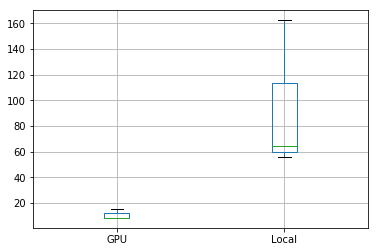

In [216]:
boxplot = times.boxplot(column=['GPU', 'Local'])

# References

[1] Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996,
https://archive.ics.uci.edu/ml/datasets/Adult

[2] François Chollet. "Keras", 2015,
https://keras.io/getting-started/sequential-model-guide/

[3] Jason Brownlee. "Dropout Regularization in Deep Learning Models With Keras", June 20, 2016
https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

[4] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science \& Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007),
https://matplotlib.org/tutorials/introductory/sample_plots.html

[5] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006),
http://www.numpy.org/

[6] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010),
http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

[7] "Confusion Matrix”: From Wikipedia, the free encyclopedia, from                                                            
https://en.wikipedia.org/wiki/Confusion_matrix
   
[8] Aurélien Géron, "_Hands on Machine learning with scikit learn and Tensorflow_", O'Reilly Media, 2017